#Задача классификации. Дерево решений
Деревья решают задачи не только с численными признаками, но и с категориальными.

In [43]:
#подключаю гуглдиск
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
#import frameworks
import pandas as pd
import seaborn as sns
from sklearn import tree #импортируем библиотеку с деревьями

In [45]:
#Загрузка наших данных
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/students.csv', delimiter=',')

In [46]:
#в этой задаче оставляем большее количество данных
df_cut=df[['Growth', 'Weight', 'Sex', 'Hair length', 'Children number']]
df_cut=df_cut.dropna()

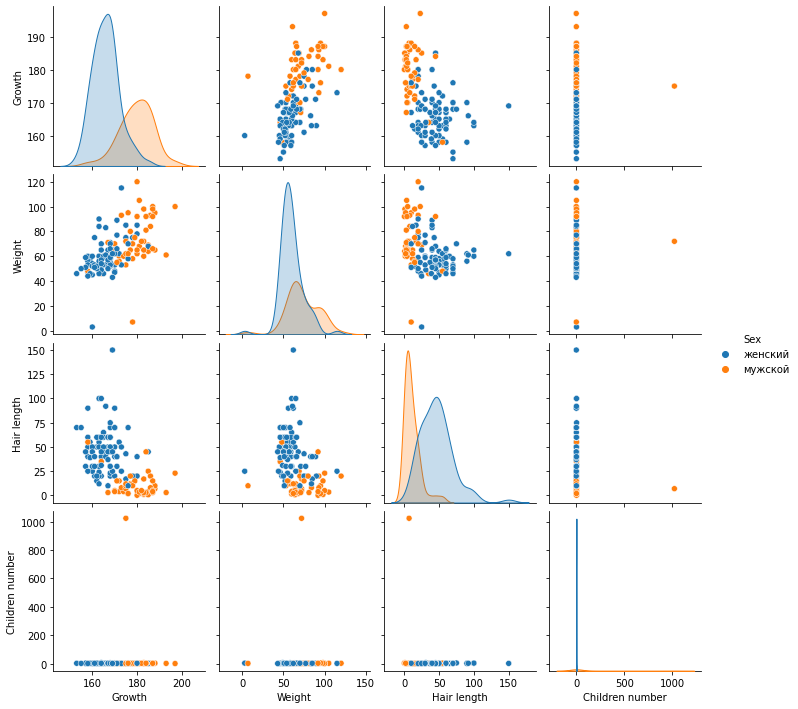

In [47]:
sns.pairplot(df_cut, hue='Sex')

Гипотеза: угадать пол человека можно за небольшое количество вопросов. И модель эти вопросы найдет автоматически.

In [48]:
#создаем модель
model=tree.DecisionTreeClassifier(max_depth=2) #здесь мы можем задавать количество уровней дерева max_depth
#большое количество уровней не всегда хорошо сказывается на результате, переобучаемость модели может снижать ее точность
#обучаем нашу модель
model.fit(df_cut[['Growth', 'Weight', 'Hair length', 'Children number']].values.reshape(-1,4), y=df_cut['Sex'].values)

DecisionTreeClassifier(max_depth=2)

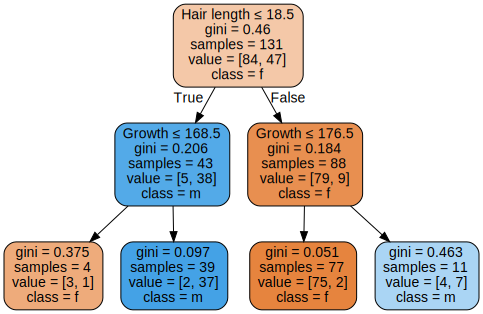

In [49]:
import graphviz
dot_data = tree.export_graphviz(model, out_file=None,
                                feature_names=['Growth', 'Weight', 'Hair length', 'Children number'],
                                class_names=['f', 'm'],
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [50]:
# загружаем данные тестовой выборки
df_test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/students_test.csv', delimiter=',')
df_test_cut=df_test[['Growth', 'Weight', 'Sex', 'Hair length', 'Children number']]
df_test_cut=df_test_cut.dropna() #удаляем данные, имеющие пустые значения

In [51]:
#Преимущества деревьев в том, что нам нет неободимости нормировать данные
df_test_cut['Predicted']=model.predict(df_test_cut[['Growth', 'Weight', 'Hair length', 'Children number']].values.reshape(-1,4))

In [52]:
pd.crosstab(df_test_cut['Predicted'], df_test_cut['Sex'])

Sex,женский,мужской
Predicted,,
женский,40,1
мужской,2,25


In [53]:
#Для более наглядной визуализации запишем следующий код:
df_test_cut['Code']='0'
df_test_cut.loc[(df_test_cut['Sex']=='мужской') & (df_test_cut['Predicted']=='женский'),'Code']='1'
df_test_cut.loc[(df_test_cut['Sex']=='женский') & (df_test_cut['Predicted']=='мужской'),'Code']='2'

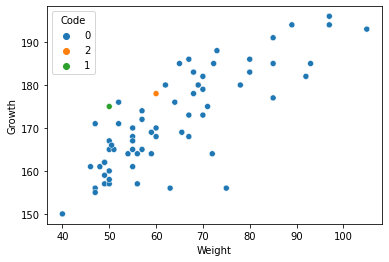

In [54]:
sns.scatterplot(data=df_test_cut, x='Weight', y='Growth', hue='Code')

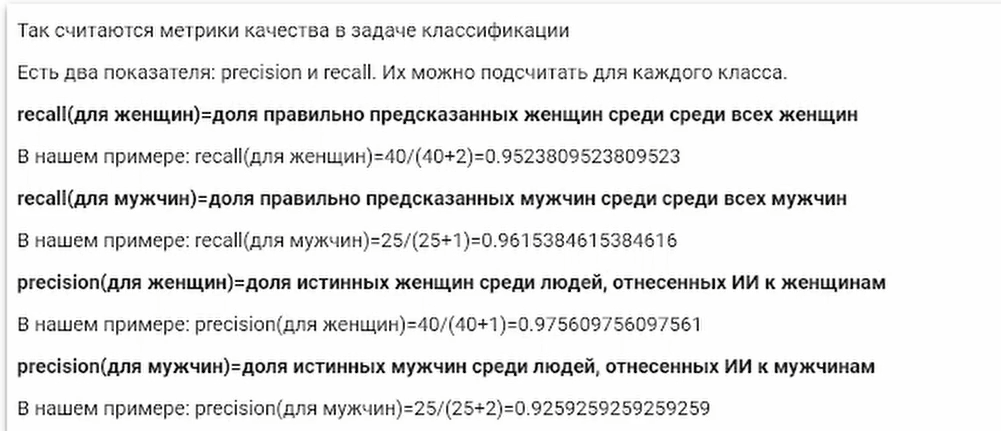

In [55]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(df_test_cut['Sex'], df_test_cut['Predicted'])

(array([0.97560976, 0.92592593]),
 array([0.95238095, 0.96153846]),
 array([0.96385542, 0.94339623]),
 array([42, 26]))